In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error


In [2]:
import pandas as pd

# خواندن دیتا
df = pd.read_csv('jshare.csv')

# تبدیل ستون date به datetime و ست کردن به عنوان ایندکس
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)



print("آخرین 5 داده:")
print(df.tail())

آخرین 5 داده:
             data
date             
1979-10-01   9.99
1980-01-01  16.20
1980-04-01  14.67
1980-07-02  16.02
1980-10-01  11.61


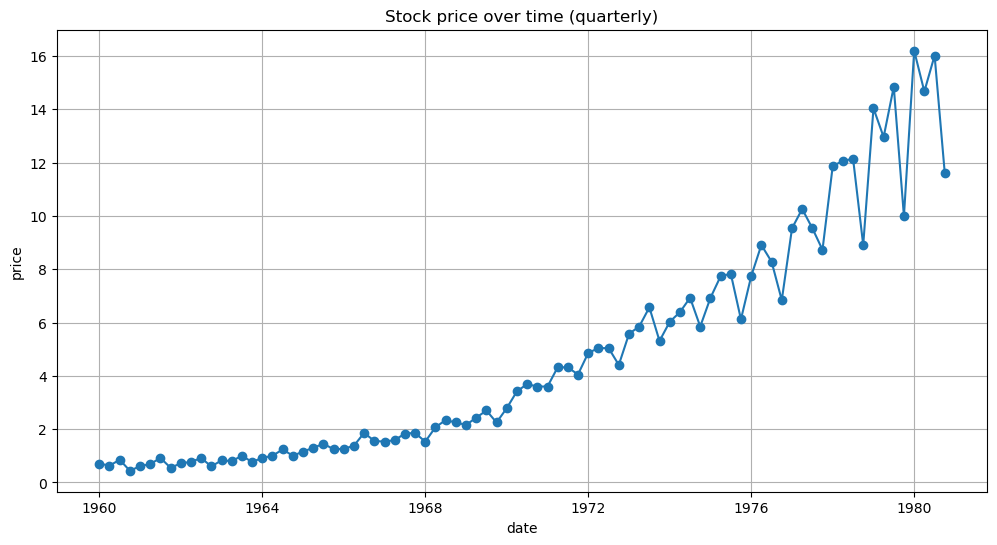

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['data'], marker='o', linestyle='-')
plt.title('Stock price over time (quarterly)')
plt.xlabel('date')
plt.ylabel('price')
plt.grid(True)
plt.show()

In [5]:
# آخر 4 دوره (۱ سال) رو برای تست می‌ذاریم
train = df.iloc[:-4]
test = df.iloc[-4:]

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# مدل SARIMA با الگوی فصلی 4 تایی (چون سه ماهه هست)
model = SARIMAX(train['data'], order=(3,1,3), seasonal_order=(1,1,1,4))
results = model.fit(disp=False)
print(results.summary())

/home/pc/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/pc/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                                data   No. Observations:                   80
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 4)   Log Likelihood                 -39.038
Date:                             Wed, 07 May 2025   AIC                             96.075
Time:                                     11:50:44   BIC                            116.932
Sample:                                          0   HQIC                           104.403
                                              - 80                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2854      0.598      0.478      0.633      -0.886       1.457
ar.L2          0.5076      

/home/pc/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
forecast = results.get_forecast(steps=len(test))
predicted = forecast.predicted_mean

# مقایسه با داده‌های واقعی
comparison = pd.DataFrame({'Actual': test['data'], 'Predicted': predicted})
print("\nمقایسه با داده‌های تست:")
print(comparison)

/home/pc/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/pc/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



مقایسه با داده‌های تست:
                     Actual  Predicted
1980-01-01 00:00:00   16.20        NaN
1980-04-01 00:00:00   14.67        NaN
1980-07-02 00:00:00   16.02        NaN
1980-10-01 00:00:00   11.61        NaN
80                      NaN  16.457019
81                      NaN  14.170149
82                      NaN  17.066809
83                      NaN  11.258533


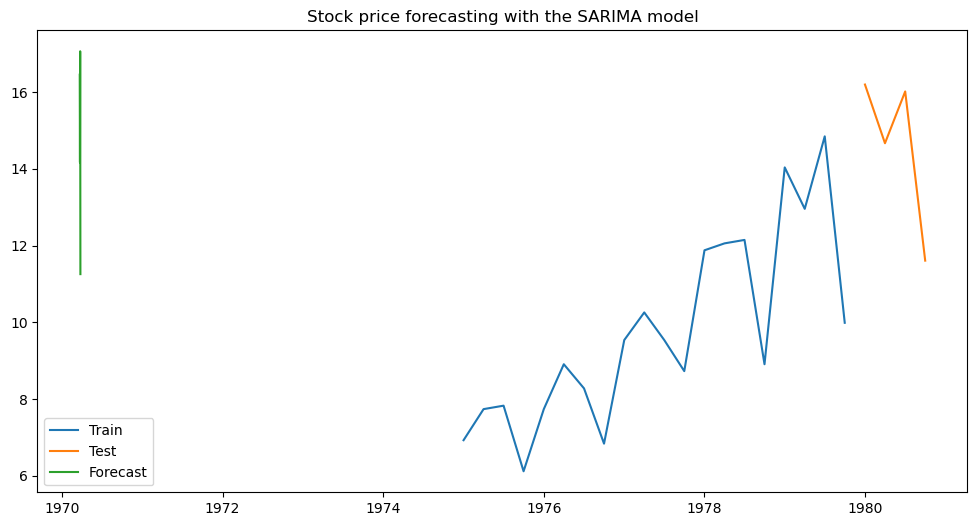

In [8]:
plt.figure(figsize=(12,6))
plt.plot(train[-20:], label='Train')
plt.plot(test, label='Test')
plt.plot(predicted, label='Forecast')
plt.legend()
plt.title('Stock price forecasting with the SARIMA model')
plt.show()

In [22]:
future_forecast = results.get_forecast(steps=4)
future_predicted = future_forecast.predicted_mean

print("\nپیش‌بینی 4 دوره آینده:")
print(future_predicted)

# اضافه کردن تاریخ به پیش‌بینی
future_index = pd.date_range(start=df.index[-1], periods=5, freq='Q')[1:]
future_df = pd.DataFrame({'Predicted Future Price': future_predicted}, index=future_index)

print("\nپیش‌بینی قیمت آینده با تاریخ:")
print(future_df)


پیش‌بینی 4 دوره آینده:
80    16.457019
81    14.170149
82    17.066809
83    11.258533
Name: predicted_mean, dtype: float64

پیش‌بینی قیمت آینده با تاریخ:
            Predicted Future Price
1981-03-31                     NaN
1981-06-30                     NaN
1981-09-30                     NaN
1981-12-31                     NaN


/home/pc/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/pc/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipykernel_11719/927348328.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_index = pd.date_range(start=df.index[-1], periods=5, freq='Q')[1:]
